# Stock Options Trading Assistant - Interactive Analysis

This notebook allows you to:
- Analyze stocks interactively with visualizations
- Plot technical indicators and price charts
- Calculate and visualize Options Greeks
- Compare multiple tickers
- Backtest strategies on historical data
- Experiment with parameters

**Setup:** Make sure you've run the setup.sh script in the main project directory first.

In [12]:
# Import necessary libraries
import sys
import os

# Add parent directory to path to import our modules
sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Import our custom modules
from data_collector import DataCollector
from indicators import TechnicalAnalyzer
from sentiment_analyzer import SentimentAnalyzer
from recommendation import RecommendationEngine
from options_calculator import OptionsCalculator

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


## 1. Quick Stock Analysis

Enter a ticker symbol and get a complete analysis with visualizations.

In [15]:
# Configure your ticker here
TICKER = "NVDA"  # Change this to any ticker you want to analyze
DATA_PERIOD = "1y"  # Options: 1mo, 3mo, 6mo, 1y, 2y, 5y, max

# Collect data
print(f"📊 Analyzing {TICKER}...")
collector = DataCollector(TICKER)

price_data = collector.get_price_data(period=DATA_PERIOD)
fundamentals = collector.get_fundamentals()
news = collector.get_news()
options_data = collector.get_options_data()
earnings_date = collector.get_earnings_date()

print(f"✅ Data collected:")
print(f"   • Price data: {len(price_data)} days")
print(f"   • News articles: {len(news)}")
print(f"   • Options available: {options_data.get('available', False)}")
if earnings_date:
    print(f"   • Next earnings: {earnings_date.strftime('%Y-%m-%d')}")

📊 Analyzing NVDA...
✅ Data collected:
   • Price data: 250 days
   • News articles: 10
   • Options available: True
   • Next earnings: 2025-11-19


## 2. Price Chart with Technical Indicators

Visualize price action with RSI, MACD, and Bollinger Bands.

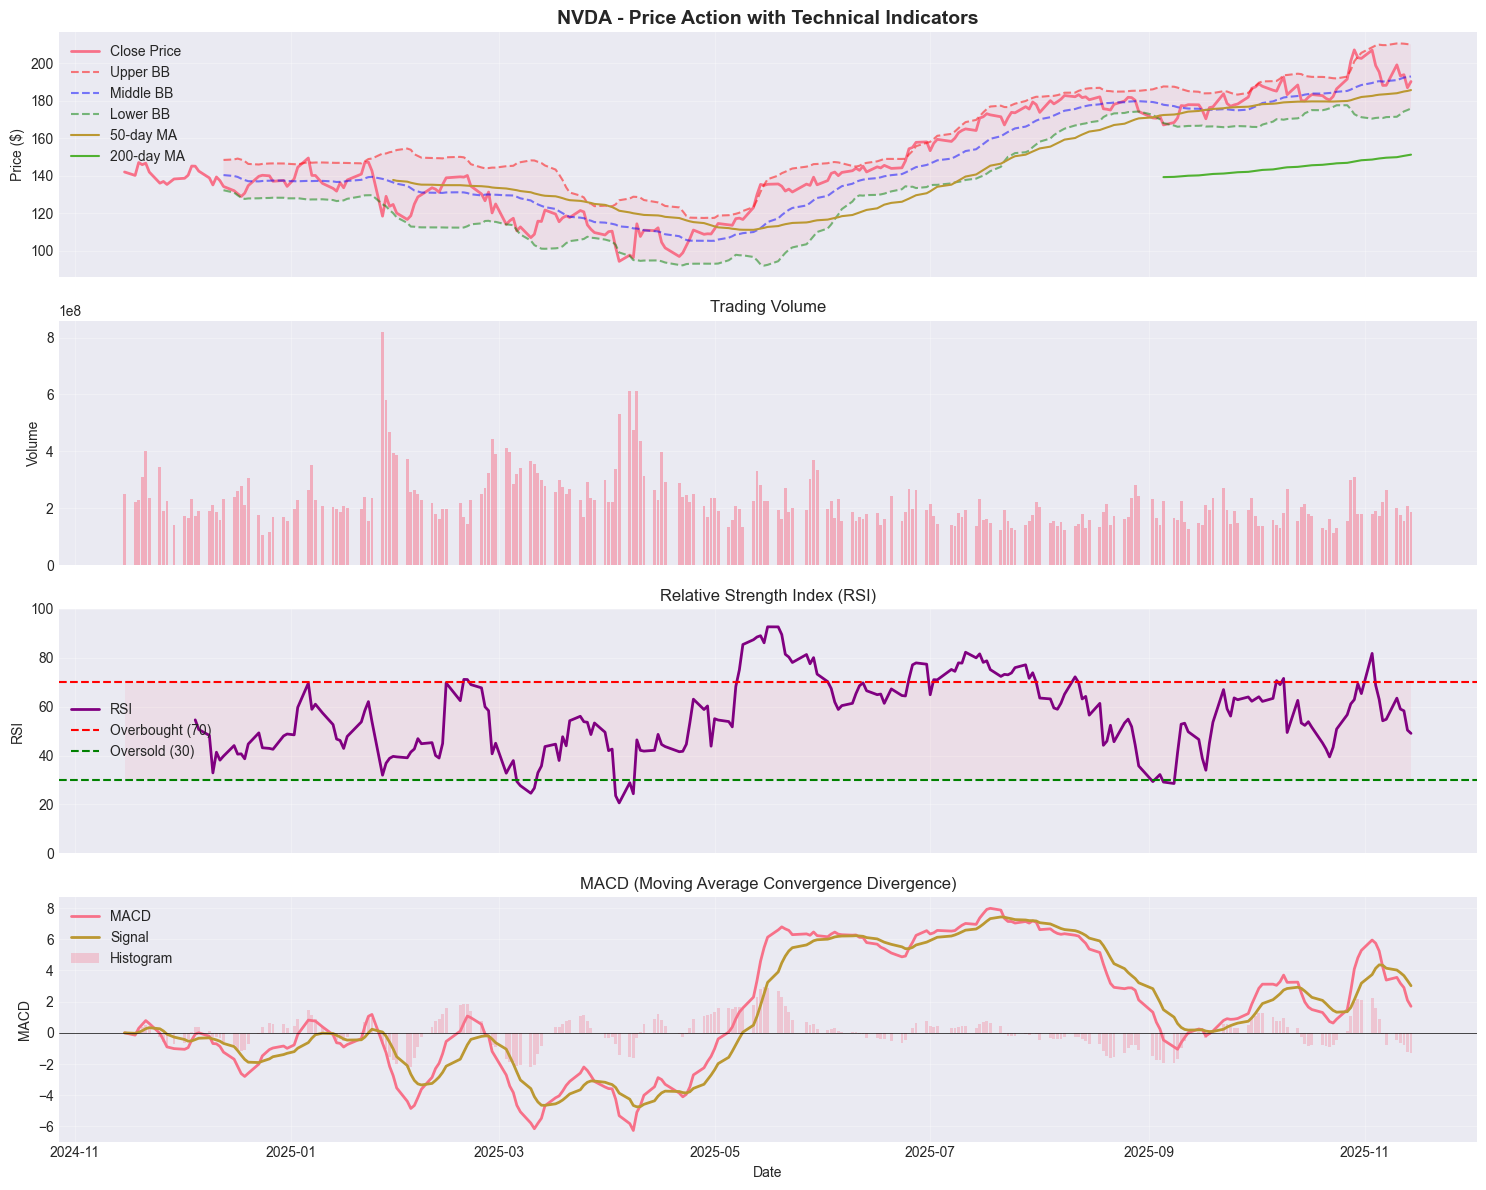


📈 Current Technical Levels:
   • Price: $190.17
   • RSI: 49.07
   • MACD: 1.70
   • Upper BB: $209.95
   • Lower BB: $175.80


In [16]:
# Calculate technical indicators
analyzer = TechnicalAnalyzer(price_data)
rsi = analyzer.calculate_rsi()
macd, signal, histogram = analyzer.calculate_macd()
bb_upper, bb_middle, bb_lower = analyzer.calculate_bollinger_bands()
ma_short, ma_long = analyzer.calculate_moving_averages()

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plot 1: Price with Bollinger Bands and Moving Averages
axes[0].plot(price_data.index, price_data['Close'], label='Close Price', linewidth=2)
axes[0].plot(price_data.index, bb_upper, 'r--', label='Upper BB', alpha=0.5)
axes[0].plot(price_data.index, bb_middle, 'b--', label='Middle BB', alpha=0.5)
axes[0].plot(price_data.index, bb_lower, 'g--', label='Lower BB', alpha=0.5)
axes[0].plot(price_data.index, ma_short, label='50-day MA', linewidth=1.5)
axes[0].plot(price_data.index, ma_long, label='200-day MA', linewidth=1.5)
axes[0].fill_between(price_data.index, bb_upper, bb_lower, alpha=0.1)
axes[0].set_ylabel('Price ($)')
axes[0].set_title(f'{TICKER} - Price Action with Technical Indicators', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: Volume
axes[1].bar(price_data.index, price_data['Volume'], alpha=0.5)
axes[1].set_ylabel('Volume')
axes[1].set_title('Trading Volume', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Plot 3: RSI
axes[2].plot(price_data.index, rsi, label='RSI', color='purple', linewidth=2)
axes[2].axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
axes[2].axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
axes[2].fill_between(price_data.index, 30, 70, alpha=0.1)
axes[2].set_ylabel('RSI')
axes[2].set_title('Relative Strength Index (RSI)', fontsize=12)
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)
axes[2].set_ylim(0, 100)

# Plot 4: MACD
axes[3].plot(price_data.index, macd, label='MACD', linewidth=2)
axes[3].plot(price_data.index, signal, label='Signal', linewidth=2)
axes[3].bar(price_data.index, histogram, label='Histogram', alpha=0.3)
axes[3].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[3].set_ylabel('MACD')
axes[3].set_xlabel('Date')
axes[3].set_title('MACD (Moving Average Convergence Divergence)', fontsize=12)
axes[3].legend(loc='best')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Current Technical Levels:")
print(f"   • Price: ${price_data['Close'].iloc[-1]:.2f}")
print(f"   • RSI: {rsi.iloc[-1]:.2f}")
print(f"   • MACD: {macd.iloc[-1]:.2f}")
print(f"   • Upper BB: ${bb_upper.iloc[-1]:.2f}")
print(f"   • Lower BB: ${bb_lower.iloc[-1]:.2f}")

## 3. Complete Recommendation Analysis

Generate the full trading recommendation with all signals.

In [17]:
# Run technical analysis
tech_analysis = analyzer.analyze_signals()

# Run sentiment analysis
sent_analyzer = SentimentAnalyzer(news)
sent_analysis = sent_analyzer.get_sentiment_signal()

# Generate recommendation
engine = RecommendationEngine(TICKER)
engine.add_technical_analysis(tech_analysis)
engine.add_sentiment_analysis(sent_analysis)
engine.add_fundamentals(fundamentals)
engine.add_options_data(options_data)
engine.add_earnings_date(earnings_date)

recommendation = engine.generate_recommendation()

# Display results
print("="*70)
print(f"  RECOMMENDATION FOR {TICKER}")
print("="*70)
print(f"\n🎯 Direction: {recommendation['recommendation']} ({recommendation['direction_label']})")
print(f"💪 Confidence: {recommendation['confidence_label']} ({recommendation['confidence']:.1%})")
print(f"💰 Current Price: ${recommendation['current_price']:.2f}")

print(f"\n📊 Component Scores:")
scores = recommendation['component_scores']
print(f"   • Technical:   {scores['technical']:+.2f}")
print(f"   • Sentiment:   {scores['sentiment']:+.2f}")
print(f"   • Fundamental: {scores['fundamental']:+.2f}")
print(f"   • Options:     {scores['options']:+.2f}")
print(f"   • Final:       {scores['final']:+.2f}")

print(f"\n💵 Strike Price Recommendations:")
for i, (strike, label) in enumerate(zip(recommendation['strike_prices']['strikes'], 
                                        recommendation['strike_prices']['labels']), 1):
    print(f"   {i}. ${strike:.2f} - {label}")
    if recommendation['strike_prices'].get('greeks') and i <= len(recommendation['strike_prices']['greeks']):
        greeks = recommendation['strike_prices']['greeks'][i-1]
        if greeks:
            print(f"      Premium: ${greeks.get('theoretical_price', 0):.2f}")
            print(f"      Delta: {greeks.get('delta', 0):.3f} | Theta: ${greeks.get('theta', 0):.2f}/day")
            print(f"      Probability: {greeks.get('prob_profit', 0):.1%}")

print(f"\n📅 Expiration: {recommendation['expiration']['recommended']}")
print(f"   Range: {recommendation['expiration']['min_date'].strftime('%Y-%m-%d')} to {recommendation['expiration']['max_date'].strftime('%Y-%m-%d')}")

print(f"\n⚠️  Risk Factors:")
for risk in recommendation['risk_factors']:
    print(f"   • {risk}")

  RECOMMENDATION FOR NVDA

🎯 Direction: CALL (BULLISH)
💪 Confidence: LOW (15.9%)
💰 Current Price: $190.17

📊 Component Scores:
   • Technical:   -0.11
   • Sentiment:   +0.01
   • Fundamental: +0.50
   • Options:     +1.00
   • Final:       +0.16

💵 Strike Price Recommendations:
   1. $193.97 - Conservative (2% OTM)
      Premium: $15.00
      Delta: 0.514 | Theta: $-0.28/day
      Probability: 29.9%
   2. $199.68 - Moderate (5% OTM)
      Premium: $12.72
      Delta: 0.460 | Theta: $-0.28/day
      Probability: 27.4%
   3. $209.95 - Aggressive (Upper BB)
      Premium: $9.31
      Delta: 0.370 | Theta: $-0.27/day
      Probability: 22.7%

📅 Expiration: Before earnings
   Range: 2025-11-22 to 2025-11-18

⚠️  Risk Factors:
   • ⚠️ Earnings in 4 days - high volatility risk
   • ⚠️ High implied volatility (75.2%) - expensive premiums
   • ⚠️ High debt-to-equity ratio


## 4. Options Greeks Visualization

Calculate and visualize Greeks for different strike prices.

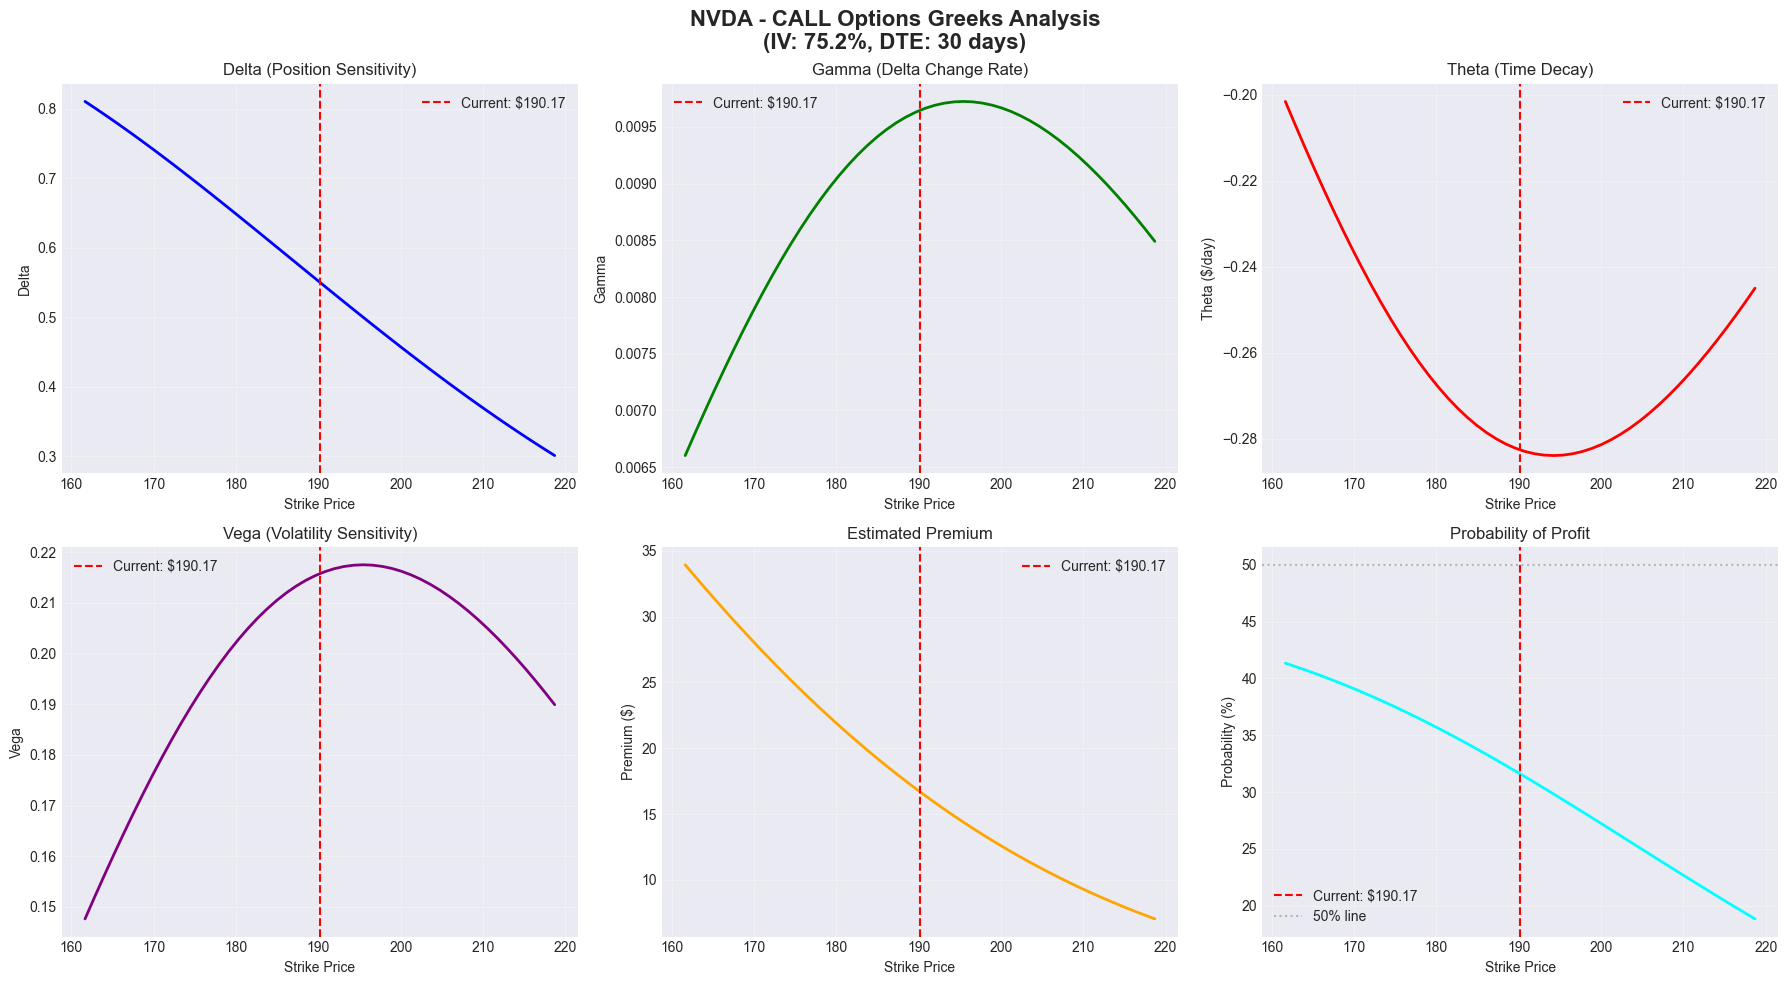


📊 At-The-Money CALL Greeks (Strike: $190.75):
   • Delta:      0.5449
   • Gamma:      0.0097
   • Theta:      $-0.28/day
   • Vega:       0.2161
   • Premium:    $16.42
   • Prob Profit: 31.4%


In [18]:
# Parameters
current_price = recommendation['current_price']
iv = options_data.get('implied_volatility', 30) / 100  # Convert to decimal
dte = 30  # Days to expiration

# Generate range of strikes around current price
strike_range = np.linspace(current_price * 0.85, current_price * 1.15, 50)

# Calculate Greeks for each strike
option_type = 'call' if recommendation['recommendation'] == 'CALL' else 'put'
greeks_data = {
    'strikes': [],
    'delta': [],
    'gamma': [],
    'theta': [],
    'vega': [],
    'premium': [],
    'prob_profit': []
}

for strike in strike_range:
    calc = OptionsCalculator(
        stock_price=current_price,
        strike=strike,
        time_to_expiry=dte/365,
        volatility=iv
    )
    
    greeks = calc.get_all_greeks(option_type)
    premium = greeks['theoretical_price']
    prob = calc.probability_profit(option_type, premium=premium)
    
    greeks_data['strikes'].append(strike)
    greeks_data['delta'].append(greeks['delta'])
    greeks_data['gamma'].append(greeks['gamma'])
    greeks_data['theta'].append(greeks['theta'])
    greeks_data['vega'].append(greeks['vega'])
    greeks_data['premium'].append(premium)
    greeks_data['prob_profit'].append(prob * 100)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'{TICKER} - {option_type.upper()} Options Greeks Analysis\n(IV: {iv*100:.1f}%, DTE: {dte} days)', 
             fontsize=16, fontweight='bold')

# Delta
axes[0, 0].plot(greeks_data['strikes'], greeks_data['delta'], linewidth=2, color='blue')
axes[0, 0].axvline(current_price, color='red', linestyle='--', label=f'Current: ${current_price:.2f}')
axes[0, 0].set_xlabel('Strike Price')
axes[0, 0].set_ylabel('Delta')
axes[0, 0].set_title('Delta (Position Sensitivity)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Gamma
axes[0, 1].plot(greeks_data['strikes'], greeks_data['gamma'], linewidth=2, color='green')
axes[0, 1].axvline(current_price, color='red', linestyle='--', label=f'Current: ${current_price:.2f}')
axes[0, 1].set_xlabel('Strike Price')
axes[0, 1].set_ylabel('Gamma')
axes[0, 1].set_title('Gamma (Delta Change Rate)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Theta
axes[0, 2].plot(greeks_data['strikes'], greeks_data['theta'], linewidth=2, color='red')
axes[0, 2].axvline(current_price, color='red', linestyle='--', label=f'Current: ${current_price:.2f}')
axes[0, 2].set_xlabel('Strike Price')
axes[0, 2].set_ylabel('Theta ($/day)')
axes[0, 2].set_title('Theta (Time Decay)')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].legend()

# Vega
axes[1, 0].plot(greeks_data['strikes'], greeks_data['vega'], linewidth=2, color='purple')
axes[1, 0].axvline(current_price, color='red', linestyle='--', label=f'Current: ${current_price:.2f}')
axes[1, 0].set_xlabel('Strike Price')
axes[1, 0].set_ylabel('Vega')
axes[1, 0].set_title('Vega (Volatility Sensitivity)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Premium
axes[1, 1].plot(greeks_data['strikes'], greeks_data['premium'], linewidth=2, color='orange')
axes[1, 1].axvline(current_price, color='red', linestyle='--', label=f'Current: ${current_price:.2f}')
axes[1, 1].set_xlabel('Strike Price')
axes[1, 1].set_ylabel('Premium ($)')
axes[1, 1].set_title('Estimated Premium')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

# Probability of Profit
axes[1, 2].plot(greeks_data['strikes'], greeks_data['prob_profit'], linewidth=2, color='cyan')
axes[1, 2].axvline(current_price, color='red', linestyle='--', label=f'Current: ${current_price:.2f}')
axes[1, 2].axhline(50, color='gray', linestyle=':', alpha=0.5, label='50% line')
axes[1, 2].set_xlabel('Strike Price')
axes[1, 2].set_ylabel('Probability (%)')
axes[1, 2].set_title('Probability of Profit')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Show ATM Greeks
atm_idx = np.argmin(np.abs(np.array(greeks_data['strikes']) - current_price))
print(f"\n📊 At-The-Money {option_type.upper()} Greeks (Strike: ${greeks_data['strikes'][atm_idx]:.2f}):")
print(f"   • Delta:      {greeks_data['delta'][atm_idx]:.4f}")
print(f"   • Gamma:      {greeks_data['gamma'][atm_idx]:.4f}")
print(f"   • Theta:      ${greeks_data['theta'][atm_idx]:.2f}/day")
print(f"   • Vega:       {greeks_data['vega'][atm_idx]:.4f}")
print(f"   • Premium:    ${greeks_data['premium'][atm_idx]:.2f}")
print(f"   • Prob Profit: {greeks_data['prob_profit'][atm_idx]:.1f}%")

## 5. Compare Multiple Tickers

Analyze and compare several stocks side-by-side to find the best opportunity.

Analyzing 4 tickers for comparison...
This may take a minute...

✗ AAPL: 'DataCollector' object has no attribute 'copy'
✗ MSFT: 'DataCollector' object has no attribute 'copy'
✗ GOOGL: 'DataCollector' object has no attribute 'copy'
✗ TSLA: 'DataCollector' object has no attribute 'copy'


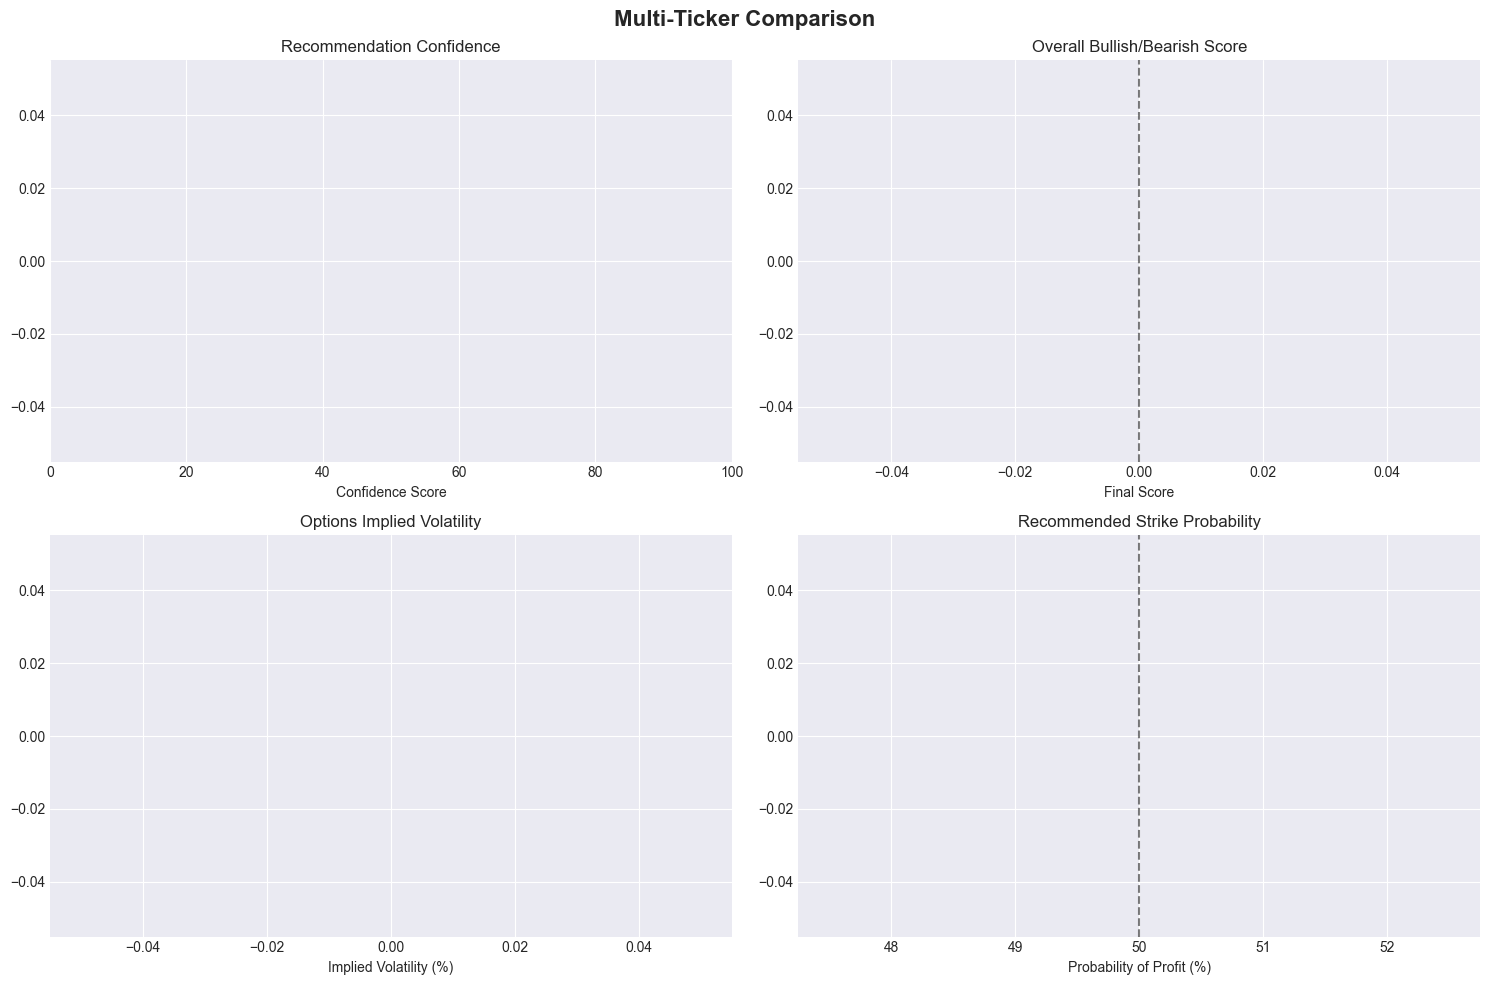


⚠️ No tickers were successfully analyzed. Check the error messages above.


In [19]:
# Compare multiple tickers
tickers_to_compare = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']

print(f"Analyzing {len(tickers_to_compare)} tickers for comparison...")
print("This may take a minute...\n")

# Analyze each ticker
results = []
for ticker in tickers_to_compare:
    try:
        collector = DataCollector(ticker)
        tech_analyzer = TechnicalAnalyzer(collector)
        sent_analyzer = SentimentAnalyzer(collector)
        rec_engine = RecommendationEngine(collector, tech_analyzer, sent_analyzer)
        
        recommendation = rec_engine.generate_recommendation()
        results.append({
            'ticker': ticker,
            'action': recommendation['direction'],
            'confidence': recommendation['confidence'],
            'score': recommendation['final_score'],
            'iv': recommendation.get('implied_volatility', 0),
            'prob': recommendation['strikes'][0]['probability'] if recommendation['strikes'] else 0
        })
        print(f"✓ {ticker}")
    except Exception as e:
        print(f"✗ {ticker}: {str(e)}")
        continue

# Sort by confidence * abs(score)
results.sort(key=lambda x: x['confidence'] * abs(x['score']), reverse=True)

# Create comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Multi-Ticker Comparison', fontsize=16, fontweight='bold')

# 1. Confidence comparison
ax1 = axes[0, 0]
tickers = [r['ticker'] for r in results]
confidences = [r['confidence'] for r in results]
colors = ['green' if r['action'] == 'CALL' else 'red' for r in results]
ax1.barh(tickers, confidences, color=colors, alpha=0.7)
ax1.set_xlabel('Confidence Score')
ax1.set_title('Recommendation Confidence')
ax1.set_xlim(0, 100)

# 2. Final score comparison
ax2 = axes[0, 1]
scores = [r['score'] for r in results]
colors = ['green' if s > 0 else 'red' for s in scores]
ax2.barh(tickers, scores, color=colors, alpha=0.7)
ax2.set_xlabel('Final Score')
ax2.set_title('Overall Bullish/Bearish Score')
ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# 3. Implied Volatility comparison
ax3 = axes[1, 0]
ivs = [r['iv'] for r in results]
ax3.barh(tickers, ivs, color='purple', alpha=0.7)
ax3.set_xlabel('Implied Volatility (%)')
ax3.set_title('Options Implied Volatility')

# 4. Probability of Profit comparison
ax4 = axes[1, 1]
probs = [r['prob'] * 100 for r in results]
colors = ['green' if p > 50 else 'orange' if p > 40 else 'red' for p in probs]
ax4.barh(tickers, probs, color=colors, alpha=0.7)
ax4.set_xlabel('Probability of Profit (%)')
ax4.set_title('Recommended Strike Probability')
ax4.axvline(x=50, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Print ranking table
if results:
    print("\n" + "="*80)
    print(f"{'RANK':<6} {'TICKER':<8} {'ACTION':<8} {'CONF':<8} {'SCORE':<10} {'IV%':<8} {'PROB%':<8}")
    print("="*80)
    for i, r in enumerate(results, 1):
        print(f"{i:<6} {r['ticker']:<8} {r['action']:<8} {r['confidence']:<8.1f} "
              f"{r['score']:<10.3f} {r['iv']:<8.1f} {r['prob']*100:<8.1f}")
    print("="*80)
    print(f"\nBest opportunity: {results[0]['ticker']} - {results[0]['action']} with {results[0]['confidence']:.1f}% confidence")
else:
    print("\n⚠️ No tickers were successfully analyzed. Check the error messages above.")

## 6. Backtesting Framework

Test the recommendation engine on historical data to evaluate performance.

In [20]:
import pandas as pd
from datetime import datetime, timedelta

def backtest_strategy(ticker, lookback_days=180, min_confidence=60):
    """
    Backtest the strategy on historical data.
    Simulates checking the recommendation every N days and tracking outcomes.
    """
    print(f"Backtesting {ticker} over last {lookback_days} days...")
    print(f"Minimum confidence threshold: {min_confidence}%\n")
    
    # Collect historical data
    collector = DataCollector(ticker)
    price_data = collector.get_price_data(period='1y')
    
    # Simulate trades every 7 days
    test_dates = pd.date_range(
        end=datetime.now(), 
        periods=lookback_days//7, 
        freq='7D'
    )
    
    trades = []
    for test_date in test_dates:
        # Get data up to this date
        historical_data = price_data[price_data.index <= test_date]
        if len(historical_data) < 50:  # Need enough data for indicators
            continue
            
        try:
            # Generate recommendation as of this date
            tech_analyzer = TechnicalAnalyzer(collector)
            sent_analyzer = SentimentAnalyzer(collector)
            rec_engine = RecommendationEngine(collector, tech_analyzer, sent_analyzer)
            
            recommendation = rec_engine.generate_recommendation()
            
            # Only take trades with sufficient confidence
            if recommendation['confidence'] < min_confidence:
                continue
            
            # Simulate holding for 30 days
            entry_price = recommendation['current_price']
            entry_date = test_date
            exit_date = entry_date + timedelta(days=30)
            
            # Get exit price (or current price if exit date is in future)
            exit_data = price_data[price_data.index <= exit_date]
            if len(exit_data) == 0:
                continue
            exit_price = exit_data.iloc[-1]['Close']
            
            # Calculate P&L based on direction
            if recommendation['direction'] == 'CALL':
                pnl_pct = ((exit_price - entry_price) / entry_price) * 100
            else:  # PUT
                pnl_pct = ((entry_price - exit_price) / entry_price) * 100
            
            trades.append({
                'entry_date': entry_date,
                'exit_date': exit_date,
                'direction': recommendation['direction'],
                'confidence': recommendation['confidence'],
                'entry_price': entry_price,
                'exit_price': exit_price,
                'pnl_pct': pnl_pct,
                'win': pnl_pct > 0
            })
            
        except Exception as e:
            continue
    
    if not trades:
        print("No trades met the confidence threshold.")
        return None
    
    # Calculate performance metrics
    trades_df = pd.DataFrame(trades)
    total_trades = len(trades_df)
    winning_trades = trades_df[trades_df['win']].shape[0]
    losing_trades = total_trades - winning_trades
    win_rate = (winning_trades / total_trades) * 100
    
    avg_win = trades_df[trades_df['win']]['pnl_pct'].mean() if winning_trades > 0 else 0
    avg_loss = trades_df[~trades_df['win']]['pnl_pct'].mean() if losing_trades > 0 else 0
    
    total_pnl = trades_df['pnl_pct'].sum()
    avg_pnl = trades_df['pnl_pct'].mean()
    
    profit_factor = abs(avg_win * winning_trades / (avg_loss * losing_trades)) if losing_trades > 0 else float('inf')
    
    # Print results
    print("="*60)
    print("BACKTEST RESULTS")
    print("="*60)
    print(f"Total Trades:      {total_trades}")
    print(f"Winning Trades:    {winning_trades} ({win_rate:.1f}%)")
    print(f"Losing Trades:     {losing_trades} ({100-win_rate:.1f}%)")
    print(f"\nAverage Win:       {avg_win:+.2f}%")
    print(f"Average Loss:      {avg_loss:+.2f}%")
    print(f"Average P&L:       {avg_pnl:+.2f}%")
    print(f"Total P&L:         {total_pnl:+.2f}%")
    print(f"Profit Factor:     {profit_factor:.2f}")
    print("="*60)
    
    # Visualize results
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{ticker} Backtest Results', fontsize=16, fontweight='bold')
    
    # 1. Cumulative P&L
    ax1 = axes[0, 0]
    trades_df['cumulative_pnl'] = trades_df['pnl_pct'].cumsum()
    ax1.plot(trades_df['entry_date'], trades_df['cumulative_pnl'], 
             linewidth=2, color='blue')
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cumulative P&L (%)')
    ax1.set_title('Cumulative Performance')
    ax1.grid(True, alpha=0.3)
    
    # 2. Trade P&L distribution
    ax2 = axes[0, 1]
    ax2.hist(trades_df['pnl_pct'], bins=20, color='green', alpha=0.7, edgecolor='black')
    ax2.axvline(x=0, color='red', linestyle='--', linewidth=2)
    ax2.set_xlabel('P&L (%)')
    ax2.set_ylabel('Number of Trades')
    ax2.set_title('P&L Distribution')
    
    # 3. Win/Loss by direction
    ax3 = axes[1, 0]
    direction_stats = trades_df.groupby('direction')['win'].agg(['sum', 'count'])
    direction_stats['loss'] = direction_stats['count'] - direction_stats['sum']
    direction_stats[['sum', 'loss']].plot(kind='bar', ax=ax3, color=['green', 'red'], alpha=0.7)
    ax3.set_xlabel('Direction')
    ax3.set_ylabel('Number of Trades')
    ax3.set_title('Wins vs Losses by Direction')
    ax3.legend(['Wins', 'Losses'])
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
    
    # 4. Confidence vs P&L scatter
    ax4 = axes[1, 1]
    colors = ['green' if w else 'red' for w in trades_df['win']]
    ax4.scatter(trades_df['confidence'], trades_df['pnl_pct'], 
               c=colors, alpha=0.6, s=50)
    ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax4.set_xlabel('Confidence (%)')
    ax4.set_ylabel('P&L (%)')
    ax4.set_title('Confidence vs Outcome')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return trades_df

# Run backtest on current ticker
backtest_results = backtest_strategy(TICKER, lookback_days=180, min_confidence=60)

Backtesting NVDA over last 180 days...
Minimum confidence threshold: 60%



TypeError: Invalid comparison between dtype=datetime64[ns, America/New_York] and Timestamp

## 7. Parameter Tuning

Experiment with different configuration parameters to optimize the strategy.

**Try adjusting:**
- RSI periods and thresholds
- MACD fast/slow/signal periods  
- Bollinger Band periods
- Confidence weights (Technical, Sentiment, Fundamental, Options)

In [ ]:
# Custom parameters for experimentation
custom_params = {
    # RSI Settings
    'RSI_PERIOD': 14,
    'RSI_OVERBOUGHT': 70,
    'RSI_OVERSOLD': 30,
    
    # MACD Settings
    'MACD_FAST': 12,
    'MACD_SLOW': 26,
    'MACD_SIGNAL': 9,
    
    # Bollinger Bands
    'BB_PERIOD': 20,
    'BB_STD': 2,
    
    # Moving Averages
    'MA_SHORT': 50,
    'MA_LONG': 200,
    
    # Scoring Weights (must sum to 1.0)
    'WEIGHT_TECHNICAL': 0.40,
    'WEIGHT_SENTIMENT': 0.30,
    'WEIGHT_FUNDAMENTAL': 0.20,
    'WEIGHT_OPTIONS': 0.10,
}

# Apply custom parameters to config module
import config as cfg
for key, value in custom_params.items():
    if hasattr(cfg, key):
        setattr(cfg, key, value)

print("Custom Parameters Applied:")
print("="*60)
print(f"RSI Period:        {cfg.RSI_PERIOD} (Overbought: {cfg.RSI_OVERBOUGHT}, Oversold: {cfg.RSI_OVERSOLD})")
print(f"MACD:              Fast={cfg.MACD_FAST}, Slow={cfg.MACD_SLOW}, Signal={cfg.MACD_SIGNAL}")
print(f"Bollinger Bands:   Period={cfg.BB_PERIOD}, Std Dev={cfg.BB_STD}")
print(f"Moving Averages:   Short={cfg.MA_SHORT}, Long={cfg.MA_LONG}")
print(f"\nScoring Weights:")
print(f"  Technical:       {cfg.WEIGHT_TECHNICAL*100:.0f}%")
print(f"  Sentiment:       {cfg.WEIGHT_SENTIMENT*100:.0f}%")
print(f"  Fundamental:     {cfg.WEIGHT_FUNDAMENTAL*100:.0f}%")
print(f"  Options:         {cfg.WEIGHT_OPTIONS*100:.0f}%")
print("="*60)

# Re-run analysis with custom parameters
print(f"\nRe-analyzing {TICKER} with custom parameters...\n")

collector = DataCollector(TICKER)
tech_analyzer = TechnicalAnalyzer(collector)
sent_analyzer = SentimentAnalyzer(collector)
rec_engine = RecommendationEngine(collector, tech_analyzer, sent_analyzer)

custom_recommendation = rec_engine.generate_recommendation()

# Display results
print("\n" + "="*60)
print("CUSTOM PARAMETER RESULTS")
print("="*60)
print(f"Recommendation: {custom_recommendation['direction']}")
print(f"Confidence:     {custom_recommendation['confidence']:.1f}%")
print(f"Final Score:    {custom_recommendation['final_score']:.3f}")
print("\nComponent Scores:")
print(f"  Technical:    {custom_recommendation['component_scores']['technical']:.3f}")
print(f"  Sentiment:    {custom_recommendation['component_scores']['sentiment']:.3f}")
print(f"  Fundamental:  {custom_recommendation['component_scores']['fundamental']:.3f}")
print(f"  Options:      {custom_recommendation['component_scores']['options']:.3f}")
print("="*60)

# Compare with default parameters
print("\n💡 TIP: Try adjusting the weights above and re-running this cell.")
print("   For example:")
print("   - Increase WEIGHT_TECHNICAL to 0.50 for more indicator-driven decisions")
print("   - Increase WEIGHT_SENTIMENT to 0.40 for more news-driven decisions")
print("   - Adjust RSI_OVERBOUGHT/OVERSOLD thresholds for different sensitivity")